In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import sklearn.metrics as metrics


In [91]:
df = pd.read_csv("water_potability.csv",sep = ',')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [92]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [93]:
df['ph'].fillna(df['ph'].mean(), inplace = True)
df['Sulfate'].fillna(df['Sulfate'].mean(), inplace = True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace = True)

In [94]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [95]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


None


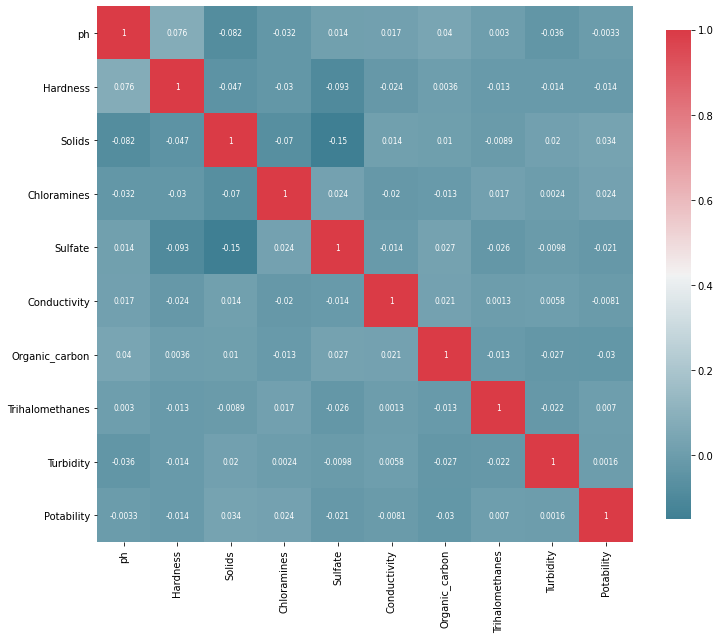

In [96]:
def plot_correlation_map( df ): 
    corr = df.corr()  
    s , ax = plt.subplots( figsize =( 12 , 10 ) ) 
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True ) 
    s = sns.heatmap( 
        corr,
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 },
        ax=ax, 
        annot = True,
        annot_kws = { 'fontsize' : 7.5 }

        )
print(plot_correlation_map(df))

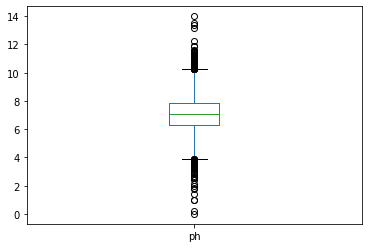

In [97]:
df['ph'].plot.box()

In [98]:
df = df[(df['ph']<13) & (df['ph']>1) ]

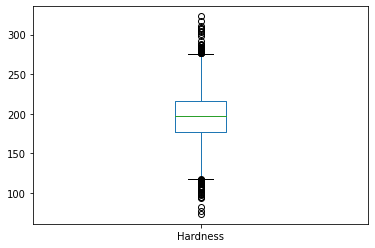

In [99]:
df['Hardness'].plot.box()

In [100]:
df = df[(df['Hardness']<330) & (df['Hardness']>80) ]

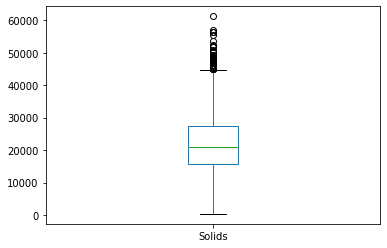

In [101]:
df['Solids'].plot.box()

In [102]:
df = df[(df['Solids']<60000)]

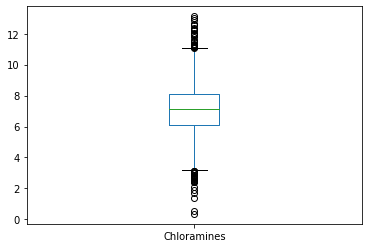

In [103]:
df['Chloramines'].plot.box()

In [104]:
df = df[(df['Chloramines']<12) & (df['Chloramines']>1) ]

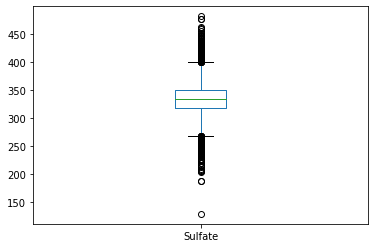

In [105]:
df['Sulfate'].plot.box()

In [106]:
df = df[(df['Sulfate']<470) & (df['Sulfate']>150) ]

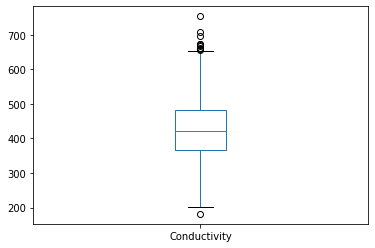

In [107]:
df['Conductivity'].plot.box()

In [108]:
df = df[(df['Conductivity']<710) & (df['Conductivity']>200) ]

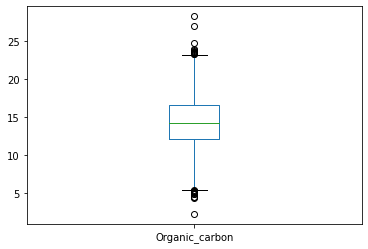

In [109]:
df['Organic_carbon'].plot.box()

In [110]:
df = df[(df['Organic_carbon']<25) & (df['Organic_carbon']>4) ]

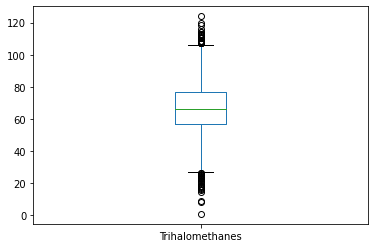

In [111]:
df['Trihalomethanes'].plot.box()

In [112]:
df = df[(df['Trihalomethanes']<130) & (df['Trihalomethanes']>10) ]

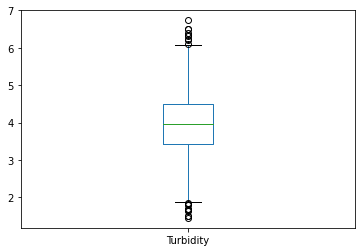

In [113]:
df['Turbidity'].plot.box()

In [114]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


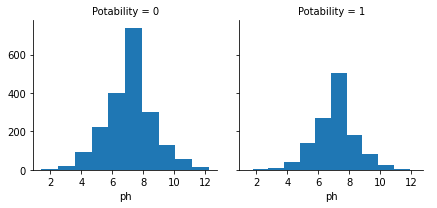

In [115]:
grid = sns.FacetGrid(df, col="Potability")
grid.map(plt.hist, "ph", bins = 10)
grid.add_legend()

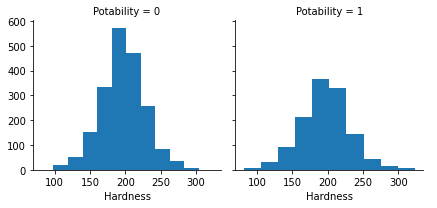

In [116]:
grid = sns.FacetGrid(df, col="Potability")
grid.map(plt.hist, "Hardness", bins = 10)
grid.add_legend()

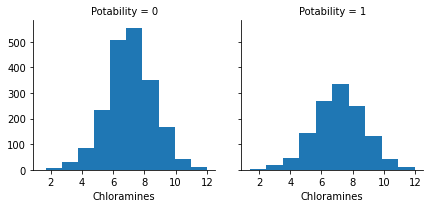

In [117]:
grid = sns.FacetGrid(df, col="Potability")
grid.map(plt.hist, "Chloramines", bins = 10)
grid.add_legend()

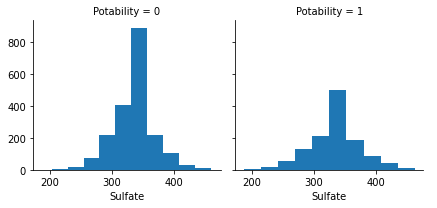

In [118]:
grid = sns.FacetGrid(df, col="Potability")
grid.map(plt.hist, "Sulfate", bins = 10)
grid.add_legend()

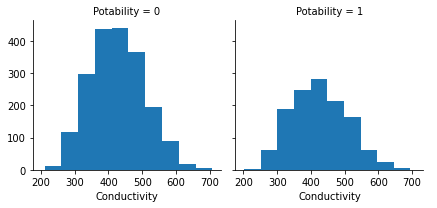

In [119]:
grid = sns.FacetGrid(df, col="Potability")
grid.map(plt.hist, "Conductivity", bins = 10)
grid.add_legend()

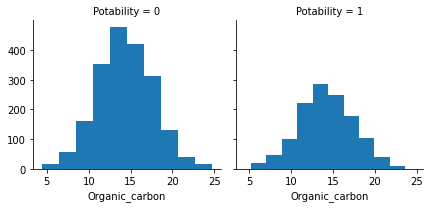

In [120]:
grid = sns.FacetGrid(df, col="Potability")
grid.map(plt.hist, "Organic_carbon", bins = 10)
grid.add_legend()

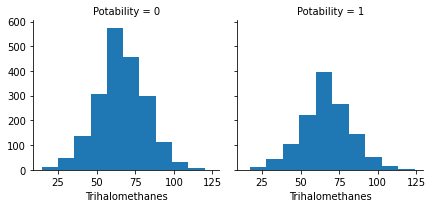

In [121]:
grid = sns.FacetGrid(df, col="Potability")
grid.map(plt.hist, "Trihalomethanes", bins = 10)
grid.add_legend()

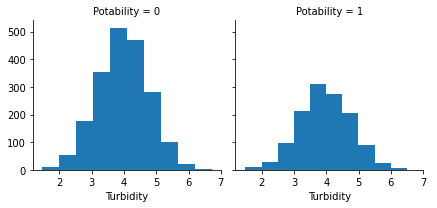

In [122]:
grid = sns.FacetGrid(df, col="Potability")
grid.map(plt.hist, "Turbidity", bins = 10)
grid.add_legend()

In [123]:
x = df[['ph','Hardness','Solids','Chloramines','Organic_carbon','Sulfate','Trihalomethanes','Conductivity']]
y= df["Potability"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0, stratify = y)  

logreg = LogisticRegression()  
logreg.fit(x_train, y_train) 
y_pred  = logreg.predict(x_test)  
logregscore = logreg.score(x_test, y_test)
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.61


In [124]:

probs = logreg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

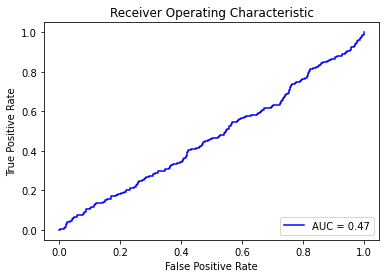

In [125]:

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr,'b',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [126]:
x = df[['ph','Hardness','Solids','Chloramines','Organic_carbon','Sulfate','Trihalomethanes','Conductivity']]
y= df["Potability"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,shuffle = True , random_state=1000, stratify = y)
model = tree.DecisionTreeClassifier(criterion = "gini",splitter = "best",max_leaf_nodes=10,min_samples_leaf=5, max_depth=5)  
model.fit(x_train,y_train)   
y_pred=model.predict(x_test)
dectreescore = accuracy_score(y_test, y_pred)
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.6296296296296297


In [127]:
clf1=RandomForestClassifier(n_estimators=100)  
scores = cross_val_score(clf1 , x , y, cv = 2)
randforscore = sum(scores)/2
print('acc : ', scores)
print('ac acc : ',sum(scores)/2)

acc :  [0.59691358 0.55617284]
ac acc :  0.5765432098765432


In [128]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,shuffle = True , random_state=1000, stratify = y) 

knn=KNeighborsClassifier(n_neighbors=20) 
knn.fit(x_train,y_train) 
y_pred=knn.predict(x_test) 
knnscore = accuracy_score(y_pred,y_test)
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.5839506172839506


In [129]:
#Support Vector Machine.
x = df[['ph','Hardness','Solids','Chloramines','Organic_carbon','Sulfate','Trihalomethanes','Conductivity']]
y= df["Potability"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,shuffle = True , random_state=1000, stratify = y)
model = SVC()
model.fit(x_train, y_train)
svc_score = model.score(x_test, y_test)

Text(0.5, 1.0, 'Model Comparison - Model Accuracy')

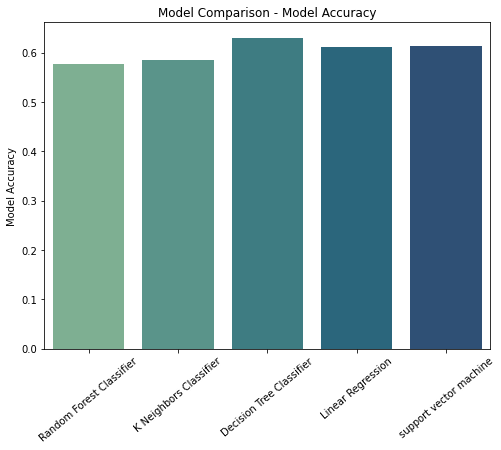

In [130]:
x = ["Random Forest Classifier", "K Neighbors Classifier", "Decision Tree Classifier", "Linear Regression","support vector machine"]
y = [randforscore, knnscore, dectreescore, logregscore,svc_score]

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=x,y=y, palette="crest");
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model Accuracy")

we will take the decision tree classifier as a model seeing that it has the best accuracy between all the models with ( 0.64)